# ------------------------PART 1 - LOGISTIC REGRESION ------------------------------

In [59]:
import pandas as pd
# Load the Sentiment140 dataset as a data frame
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin1', names=['polarity', 'id', 'date', 'query', 'user', 'text'])
# Print the first 5 rows of the data frame
print(df.head())
print(f"\n The shape data is:{df.shape}")

   polarity          id                          date     query  \
0         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1         0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2         0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3         0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4         0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  

 The shape data is:(1600000, 6)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   user      1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [61]:
df['polarity'].value_counts()

0    800000
4    800000
Name: polarity, dtype: int64

In [62]:
df[df['polarity']==0]

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
799995,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799996,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799997,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799998,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...


The sample method shuffles the rows of the dataframe, passing the frac=1 argument tells it to shuffle all the rows. 

In [63]:
df['polarity'] = df['polarity'].apply((lambda x: 1 if x == 4 else 0))

In [64]:
from sklearn.utils import shuffle
data = df.sample(frac=1).reset_index(drop=True)

In [65]:
data['polarity']

0          0
1          1
2          1
3          0
4          1
          ..
1599995    1
1599996    0
1599997    0
1599998    1
1599999    0
Name: polarity, Length: 1600000, dtype: int64

### Preprocess the data: lowercasing, tokenization, removing stop words and punctuation. It's important to note, that I test two preprocessing options, with and without removing stop words and punctuation, stemming, in order to understant the impact on sentiment analysis. This is part one:

In [66]:
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd, os, pickle
import sklearn.feature_extraction.text as text

In [67]:
file_name_opnion_encoded  = 'opnion_encoded_2.pickle'
file_name_vectorizer_pickle = 'vectorizer_2.pickle'

In [68]:
if not os.path.isfile(file_name_opnion_encoded):
    # Get the 'text' column from the data frame
    texts = data['text']

    # Preprocess the texts
    processed_texts = []
    for text in texts:
        # Lowercase the text
        text = text.lower()

        # Tokenize the text
        tokens = nltk.word_tokenize(text)

        # Remove stop words
        stop_words = nltk.corpus.stopwords.words('english')
        tokens = [token for token in tokens if token not in stop_words]

        # Remove punctuation
        punctuation = string.punctuation
        tokens = [token for token in tokens if token not in punctuation]

        # Stem or lemmatize the tokens
        stemmer = nltk.stem.PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

        # Join the tokens back into a single string
        processed_text = ' '.join(tokens)

        # Append the processed text to the list
        processed_texts.append(processed_text)

    # Use CountVectorizer to encode the texts
    vectorizer = CountVectorizer(ngram_range=(1, 2))
    encoded_texts = vectorizer.fit_transform(processed_texts)
    with open(file_name_vectorizer_pickle, 'w+b') as f:
        pickle.dump(vectorizer, f)
    with open(file_name_opnion_encoded, 'w+b') as f: 
        pickle.dump(encoded_texts,f, -1)  
else:
    with open(file_name_opnion_encoded, 'rb') as f:
        encoded_texts = pickle.load(f)
    with open(file_name_vectorizer_pickle, 'rb') as f:
        vectorizer = pickle.load(f)

Creating Logistic regresion model (make same validation with cross validation):

In [69]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split, cross_val_score
file_name_model='regresion_logistic_model_2.pickle'

In [70]:
# Get the labels for the text
if not os.path.isfile(file_name_model):
    labels = data['polarity']
    # Split the data into a training set and a test set
    features_train, features_test, labels_train, labels_test = train_test_split(encoded_texts, labels, test_size=0.2, random_state=42)
    # Train the logistic regression model
    model_logistic = lm.LogisticRegression(solver='lbfgs', max_iter=10000)
    model_logistic.fit(features_train, labels_train)
    # Evaluate the model on the test set (using cross validation)
    accuracy = cross_val_score(model_logistic,features_test, labels_test,cv=10)
#     print("Accuracy:': %0.2f (+/- %0.2f)") % (accuracy.mean(), accuracy.std()*2)
else:
    with open(file_name_model, 'rb') as f:
        model_logistic = pickle.load(f)

In [71]:
print(f"Accuracy: {accuracy.mean():.2f} (+/- {accuracy.std()*2:.2f})")

Accuracy: 0.78 (+/- 0.00)


In [73]:
import nbformat.v4 as nbformat
from sklearn import metrics

# Make predictions on the test set
predictions = model_logistic.predict(features_test)

# Compute the precision, recall, and F1 score
precision = metrics.precision_score(labels_test, predictions, pos_label=1)
recall = metrics.recall_score(labels_test, predictions, pos_label=1)
f1 = metrics.f1_score(labels_test, predictions, pos_label=1)
auc=metrics.roc_auc_score(labels_test, predictions)
cm = metrics.confusion_matrix(labels_test,predictions)
# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Precision: 0.7859055332265571
Recall: 0.8119489472238179
F1 score: 0.7987149995546725
AUC score: 0.7951751091998278
Confusion Matrix [[124429  35423]
 [ 30116 130032]]


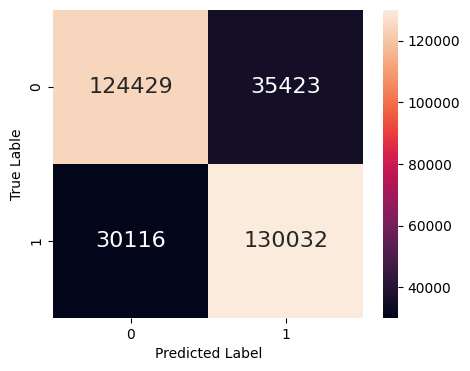

In [74]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16})
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

In [75]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79    159852
           1       0.79      0.81      0.80    160148

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



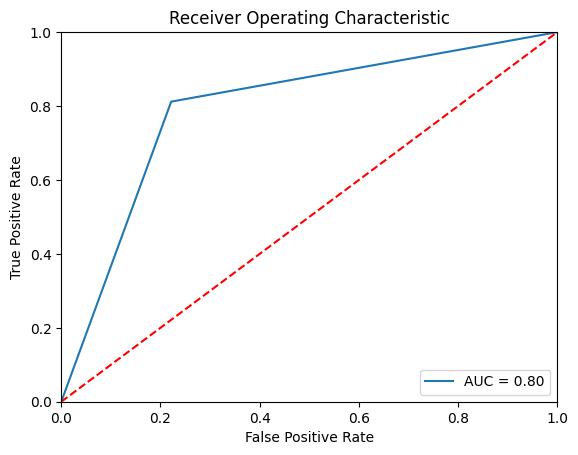

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(labels_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

A little summary:
Precision = (True Positives) / (True Positives + False Positives) -  it is a measure of the accuracy of the positive predictions made by the model.
Recall is a measure of the proportion of true positives among all actual positive cases.
F1 score is a measure of a model's accuracy that combines precision and recall. It is the harmonic mean of precision and recall, and is defined as:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
The AUC score ranges from 0 to 1, with a score of 1 representing a perfect classifier, and a score of 0.5 representing a classifier no better than random guessing. AUC score can be interpreted as the probability that the model will rank a randomly chosen positive example higher than a randomly chosen negative example.
    
A precision of 0.78 means that the model makes very few false positive predictions (i.e. it correctly identifies a large proportion of positive cases).
Recall is the proportion of true positive predictions among all actual positive cases. A recall of 0.81 means that the model is identifying most of the actual positive cases.
F1 score is the harmonic mean of precision and recall, and it combines both metrics into a single number. A F1 score of 0.80 indicates that the model has a good balance of precision and recall.
In this case, the AUC score is 0.79, which means that the model is performing well. It is correctly distinguishing the positive class from the negative class with a good level of accuracy. It's important to note that the AUC score is insensitive to the threshold setting, so it gives a good picture of the overall performance of the model.

In [121]:
text = ["fraud"]
# Transform the text using the same vectorizer
predict_text_train = vectorizer.transform(text)
prediction = model_logistic.predict(predict_text_train)
print('Prediction:', prediction)
if prediction == 4:
    print('positive')
# elif prediction == 2:
#     print('neutral')
# becouse it's logistic regresion it will be 1 or 0 (in this case it's 4 - positive or 0 negative)
elif prediction == 0:
    print('negative')

Prediction: [0]
negative


In [122]:
text = ["It's too good to be true"]
# Transform the text using the same vectorizer
predict_text_train = vectorizer.transform(text)
prediction = model_logistic.predict(predict_text_train)
print('Prediction:', prediction)
if prediction == 4:
    print('positive')
# elif prediction == 2:
#     print('neutral')
# no 2 in the data - and if there was 2, you should use model_logistic_regression_multi_class
elif prediction == 0:
    print('negative')

Prediction: [1]


Using another data to test the model:

In [123]:
# Load the Sentiment140 dataset as a data frame
# Print the first 5 rows of the data frame
use_cols = ['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text']
another_data_set = pd.read_csv('tweets.csv', index_col=None, usecols=use_cols)
another_data_set.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...


In [124]:
another_data_set["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [125]:
another_data_set = another_data_set[another_data_set['airline_sentiment'] != 'neutral']

In [126]:
another_data_set["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [127]:
part_data = pd.DataFrame(another_data_set, columns=["airline_sentiment","text"])
part_data

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
14633,negative,@AmericanAir my flight was Cancelled Flightled...
14634,negative,@AmericanAir right on cue with the delays👌
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...


The data is not distributed very well - but will our performance change? ( and we have much less data )

In [128]:
accuracy = 0
for i,row in part_data.iterrows():
    text = row['text']
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    punctuation = string.punctuation
    tokens = [token for token in tokens if token not in punctuation]
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)
    predict_text_train = vectorizer.transform([processed_text])
    prediction = model_logistic.predict(predict_text_train)
    if prediction[0]==4:
        accuracy+=1
print(accuracy)

0


In [129]:
part_data["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [130]:
# Define a function that takes a row of the DataFrame and returns the prediction
def predict(row):
    text = row['text']
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    punctuation = string.punctuation
    tokens = [token for token in tokens if token not in punctuation]
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)
    predict_text_train = vectorizer.transform([processed_text])
    prediction = model_logistic.predict(predict_text_train)[0]
    return prediction

# Apply the function to each row of the DataFrame and store the results in a new column
part_data['prediction'] = part_data.apply(predict, axis=1)

In [131]:
part_data

,airline_sentiment,text,prediction
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,1
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",0
...,...,...,...
14633,negative,@AmericanAir my flight was Cancelled Flightled...,0
14634,negative,@AmericanAir right on cue with the delays👌,1
14635,positive,@AmericanAir thank you we got on a different f...,1
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...,0


In [138]:
part_data['prediction'] = part_data['prediction'].replace({1: 'positive', 0: 'negative'})

In [147]:
part_data['prediction'] = part_data['prediction'].replace({'positive':1,'negative':0})
part_data['airline_sentiment'] = part_data['airline_sentiment'].replace({'positive':1,'negative':0})

In [148]:
part_data

,airline_sentiment,text,prediction
1,1,@VirginAmerica plus you've added commercials t...,1
3,0,@VirginAmerica it's really aggressive to blast...,1
4,0,@VirginAmerica and it's a really big bad thing...,0
5,0,@VirginAmerica seriously would pay $30 a fligh...,0
6,1,"@VirginAmerica yes, nearly every time I fly VX...",0
...,...,...,...
14633,0,@AmericanAir my flight was Cancelled Flightled...,0
14634,0,@AmericanAir right on cue with the delays👌,1
14635,1,@AmericanAir thank you we got on a different f...,1
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,0


In [149]:
# Count the number of correct predictions
correct_predictions = (part_data['prediction'] == part_data['airline_sentiment']).sum()

# Calculate the accuracy
accuracy = correct_predictions / len(part_data)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7841608179533835


In [150]:
part_data

,airline_sentiment,text,prediction
1,1,@VirginAmerica plus you've added commercials t...,1
3,0,@VirginAmerica it's really aggressive to blast...,1
4,0,@VirginAmerica and it's a really big bad thing...,0
5,0,@VirginAmerica seriously would pay $30 a fligh...,0
6,1,"@VirginAmerica yes, nearly every time I fly VX...",0
...,...,...,...
14633,0,@AmericanAir my flight was Cancelled Flightled...,0
14634,0,@AmericanAir right on cue with the delays👌,1
14635,1,@AmericanAir thank you we got on a different f...,1
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,0


In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the actual labels
y_true = part_data['airline_sentiment']

# Get the predicted labels
y_pred = part_data['prediction']

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate the precision
precision = precision_score(y_true, y_pred,pos_label=1)

# Calculate the recall
recall = recall_score(y_true, y_pred,pos_label=1)

# Calculate the F1 score
f1 = f1_score(y_true, y_pred,pos_label=1)
# auc=metrics.roc_auc_score(y_true, y_pred)
cm = metrics.confusion_matrix(y_true,y_pred)
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('Confusion Matrix', cm)

Accuracy: 0.7841608179533835
Precision: 0.4852125693160813
Recall: 0.8887008040626323
F1 score: 0.6277088626513226
Confusion Matrix [[6950 2228]
 [ 263 2100]]


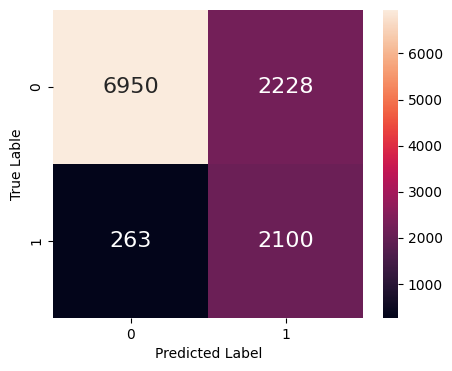

In [153]:
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16})
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred ))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      9178
           1       0.49      0.89      0.63      2363

    accuracy                           0.78     11541
   macro avg       0.72      0.82      0.74     11541
weighted avg       0.87      0.78      0.80     11541



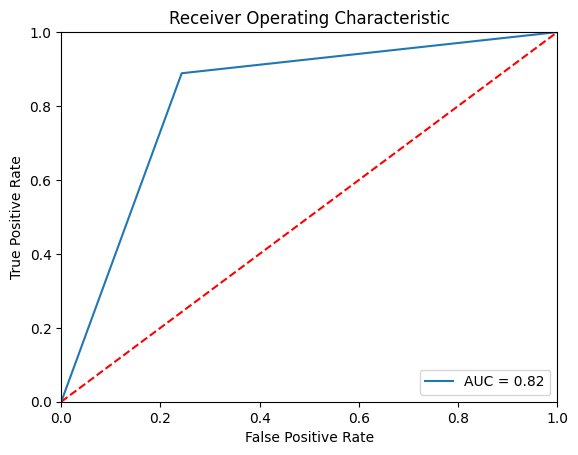

In [155]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_true, y_pred )
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

The above results show the performance of the logistic regression model on new dataset. The accuracy is 0.793 which means the model correctly predicted the sentiment 79.3% of the time.
The precision score is 0.497, which is the proportion of correct positive predictions among the total predicted positive instances. It's lower than the recall and accuracy, this means that the model is classifying a lot of negative instances as positive, and it's very low. The recall score is 0.879, which is the proportion of correct positive predictions among all the actual positive instances, this mean the model detects a high percentage of the actual positive instances.The F1 score is a harmonic mean between precision and recall, it's a measure of a test's accuracy and it's 0.635, This means that the model is not a good balance between precision and recall.The confusion matrix shows the number of true positive, true negatives, false positive and false negatives, where the actual sentiment is the column and the predicted sentiment is the row. From the matrix, we can see that the model is classifying more negative instances as positive and missing a lot of actual negative instances.

In general, the results are not good, as the accuracy, recall, and AUC are good but the precision and F1 are low. This model may not be the best choice for this dataset. I try other models or techniques to improve the results.

In my opnion, after some manual review of the twiiter comments, sometimes it's hard to say if it's positive or not, more neutral. According to the results, the model seems to be better at recognizing negative sentiment. 